# Virtual capative tests regression

In [1]:
%load_ext kedro.extras.extensions.ipython
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%config Completer.use_jedi = False

[12/21/23 17:23:12] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/extras ]8;id=620624;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=399157;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             /extensions/ipython.py:19: KedroDeprecationWarning:                                   
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: /home/maa/dev/PHD.                           ]8;id=843300;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=888568;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/framew ]8;id=773762;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=284622;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             ork/startup.py:99: KedroDeprecationWarning: project_version in                        
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[12/21/23 17:23:20] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/par ]8;id=424939;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=323181;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             titioned_dataset.py:200: KedroDeprecationWarning: 'PartitionedDataset'                
                             has been moved to `kedro-datasets` and will be removed in Kedro                       
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project phd                                                      ]8;id=211163;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=8818;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=10612;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=8587;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=94847;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=855404;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
from vessel_manoeuvring_models.prime_system import PrimeSystem
from phd.visualization.plot_prediction import plot_total_force, plot_force_components, predict, plot_compare_model_forces, plot_parameter_contributions
from vct.bokeh_plotting import create_tab
from vessel_manoeuvring_models.symbols import *
import matplotlib.pyplot as plt
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15,10)
from vessel_manoeuvring_models.parameters import df_parameters
p = df_parameters["symbol"]
import statsmodels.api as sm
from phd.pipelines.regression_VCT.optimize import fit

Loading BokehJS ...

In [3]:
#%reload_kedro
ship='wPCC'
ship_data = catalog.load(f"{ship}.ship_data")
model_loaders = catalog.load(f"{ship}.models_VCT")
models_rudder_VCT_loaders = catalog.load(f"{ship}.models_rudder_VCT")

df_VCT_scaled = catalog.load(f"{ship}.df_VCT_scaled")
tests_ek_smooth = catalog.load(f"{ship}.tests_ek_smooth")
tests_ek = catalog.load(f"{ship}.tests_ek")

[12/21/23 17:24:13] INFO     Loading data from 'wPCC.ship_data' (YAMLDataSet)...                ]8;id=932507;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=53446;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.models_VCT' (PartitionedDataset)...        ]8;id=380178;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=601017;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.models_rudder_VCT' (PartitionedDataset)... ]8;id=883313;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=26447;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.df_VCT_scaled' (CSVDataSet)...             ]8;id=778923;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=848229;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.tests_ek_smooth' (PartitionedDataset)...   ]8;id=43337;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=665660;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.tests_ek' (PartitionedDataset)...          ]8;id=837009;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=14125;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Two different models are regressed: `model` which has a new semi empirical ruder model, and `model_abkowitz` which has pure mathematical rudder model taken from the well known Abkowitz manoeuvring model. The regression is conducted in a Kedro pipeline, the resulting models from this pipeline can be loaded.

In [4]:
model = model_loaders['semiempirical_covered']()

In [5]:
model_abkowitz = models_rudder_VCT_loaders['Abkowitz']()

## Predicting the VCT data with regressed models

In [7]:
df_VCT_predict = predict(model, data=df_VCT_scaled)
df_VCT_predict['model_name'] = 'VCT regression semiempirical rudder'

df_VCT_predict_rudder_VCT = predict(model_abkowitz, data=df_VCT_scaled)
df_VCT_predict_rudder_VCT['model_name'] = 'VCT regression simple rudder'


df_result = pd.concat((df_VCT_scaled, df_VCT_predict,df_VCT_predict_rudder_VCT), axis=0)

In [10]:
#create_tab(df_result, ys=['X_D','Y_D','N_D','Y_H','N_H','X_R','Y_R','N_R'], plot_width=1200)

## Compare with MDL inverse dynamics
The forces from model tests in MDL can be estimated with inverse dynamics. These forces can be compared with forces predicted with the regressed models.

In [8]:
#id = 22773
id = 22772
#id = 22770
#id = 22764
#id = 22774
#id = 22616  # Spiral


data_MDL = tests_ek_smooth[f'{id}']()
data_MDL_ek = tests_ek[f'{id}']()


data_MDL['V'] = data_MDL['U'] = np.sqrt(data_MDL['u']**2 + data_MDL['v']**2)
data_MDL['beta'] = -np.arctan2(data_MDL['v'],data_MDL['u'])
data_MDL['rev'] = data_MDL[['Prop/PS/Rpm','Prop/SB/Rpm']].mean(axis=1)
data_MDL['twa']=0
data_MDL['tws']=0
data_MDL['theta']=0
data_MDL['q']=0
data_MDL['phi'] = data_MDL['roll']
data_MDL['p'] = 0
data_MDL['q1d'] = 0
data_MDL['thrust_port'] = data_MDL['Prop/PS/Thrust']
data_MDL['thrust_stbd'] = data_MDL['Prop/SB/Thrust']

data_MDL_ek['V'] = data_MDL_ek['U'] = np.sqrt(data_MDL_ek['u']**2 + data_MDL_ek['v']**2)
data_MDL_ek['beta'] = -np.arctan2(data_MDL_ek['v'],data_MDL_ek['u'])
data_MDL_ek['rev'] = data_MDL_ek[['Prop/PS/Rpm','Prop/SB/Rpm']].mean(axis=1)
data_MDL_ek['twa']=0
data_MDL_ek['tws']=0
data_MDL_ek['theta']=0
data_MDL_ek['q']=0
data_MDL_ek['phi'] = data_MDL_ek['roll']
data_MDL_ek['p'] = 0
data_MDL_ek['q1d'] = 0
data_MDL_ek['thrust_port'] = data_MDL_ek['Prop/PS/Thrust']
data_MDL_ek['thrust_stbd'] = data_MDL_ek['Prop/SB/Thrust']

Some additional tuning was required on the regressed models to get a good agreement. These adopted models can also be loaded from the pipeline.

In [10]:
model_MDL_loaders = catalog.load(f"{ship}.models_VCT_MDL")
model_rudder_MDL_loaders = catalog.load(f"{ship}.models_rudder_VCT_MDL")

model_MDL = model_MDL_loaders['semiempirical_covered']()
model_abkowitz_MDL = model_rudder_MDL_loaders['Abkowitz']()

[12/21/23 17:34:33] INFO     Loading data from 'wPCC.models_VCT_MDL' (PartitionedDataset)...    ]8;id=668333;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=163889;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'wPCC.models_rudder_VCT_MDL'                     ]8;id=273347;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=995563;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PartitionedDataset)...                                                               

In [11]:
styles = {
    'Experiment':{'style':'-', 'color':'green', 'zorder':-10, 'lw':1.0,'label':'Experiment'},
    'Semi-empirical rudder':{'style':'b-','lw':0.5,'label':'Semi-empirical rudder'},
    'Abkowitz rudder':{'style':'r-','lw':0.5,'label':'Abkowitz rudder'},
    }

models = {
    'Semi-empirical rudder': model_MDL,
    'Abkowitz rudder': model_abkowitz_MDL,
    
}

The two models have very different decompositions of the forces and moments as seen below, where especially the model with the semi-empirical rudder model has good agreement with the estimated forces from the experiment. 

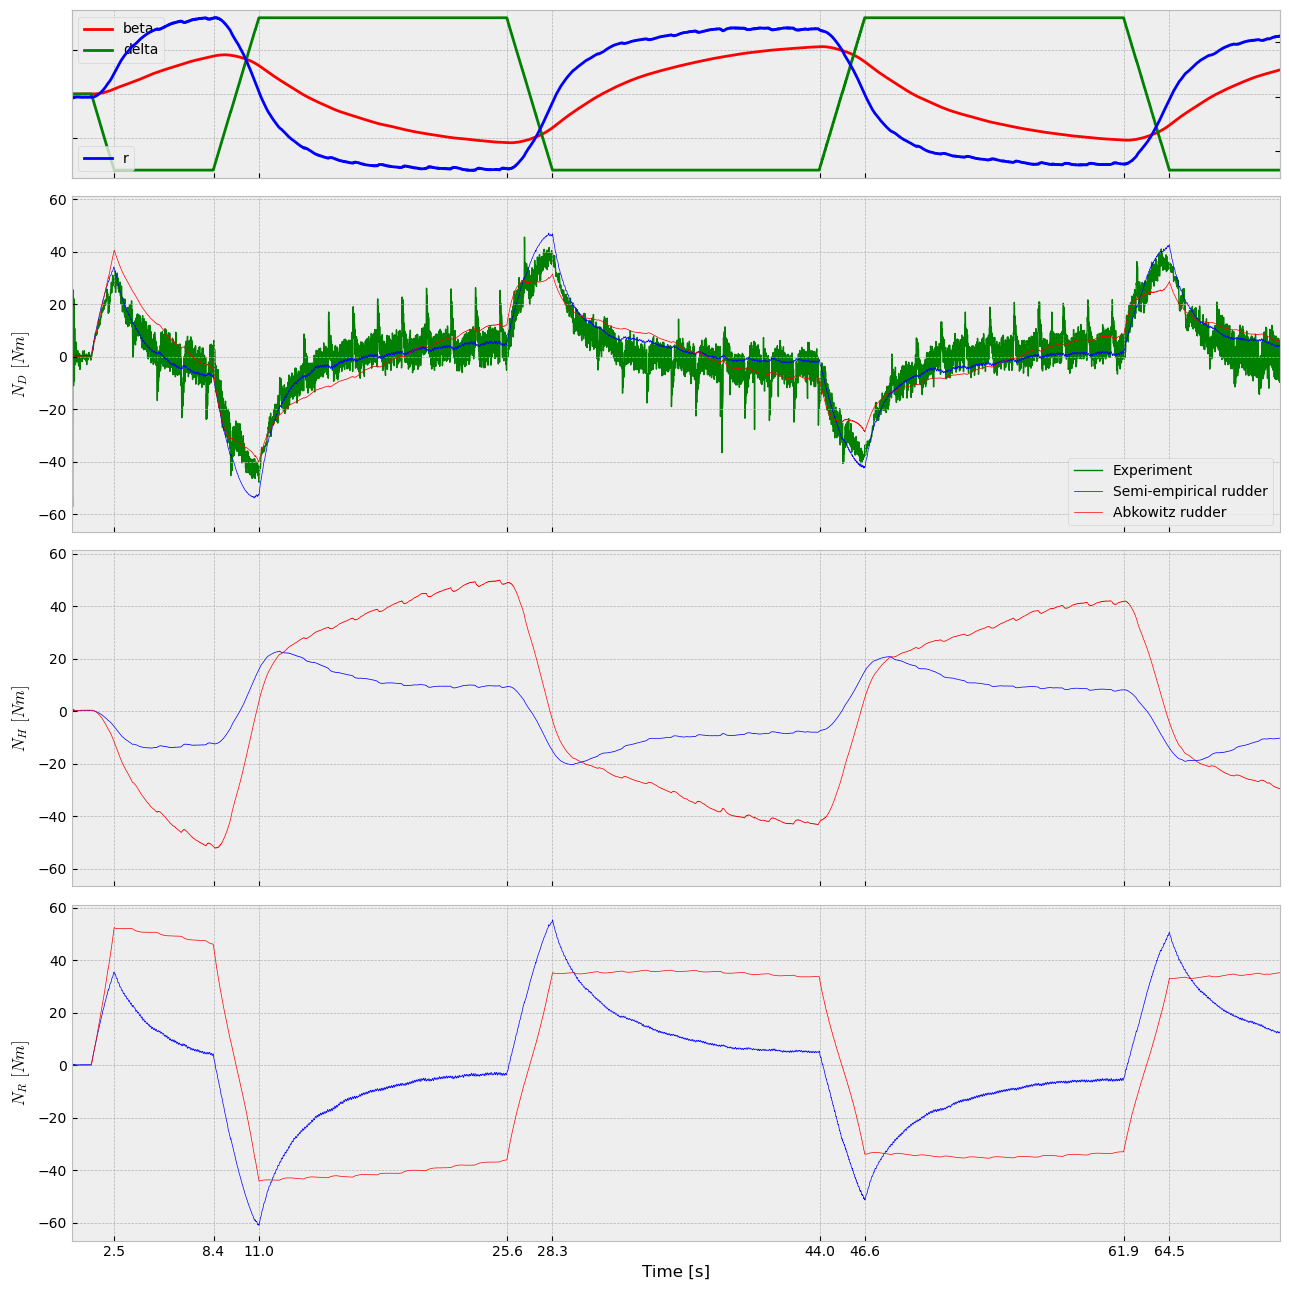

In [12]:
plot_compare_model_forces(model=model_MDL, models=models, data=data_MDL_ek, keys=['N_D','N_H','N_R'], styles=styles)

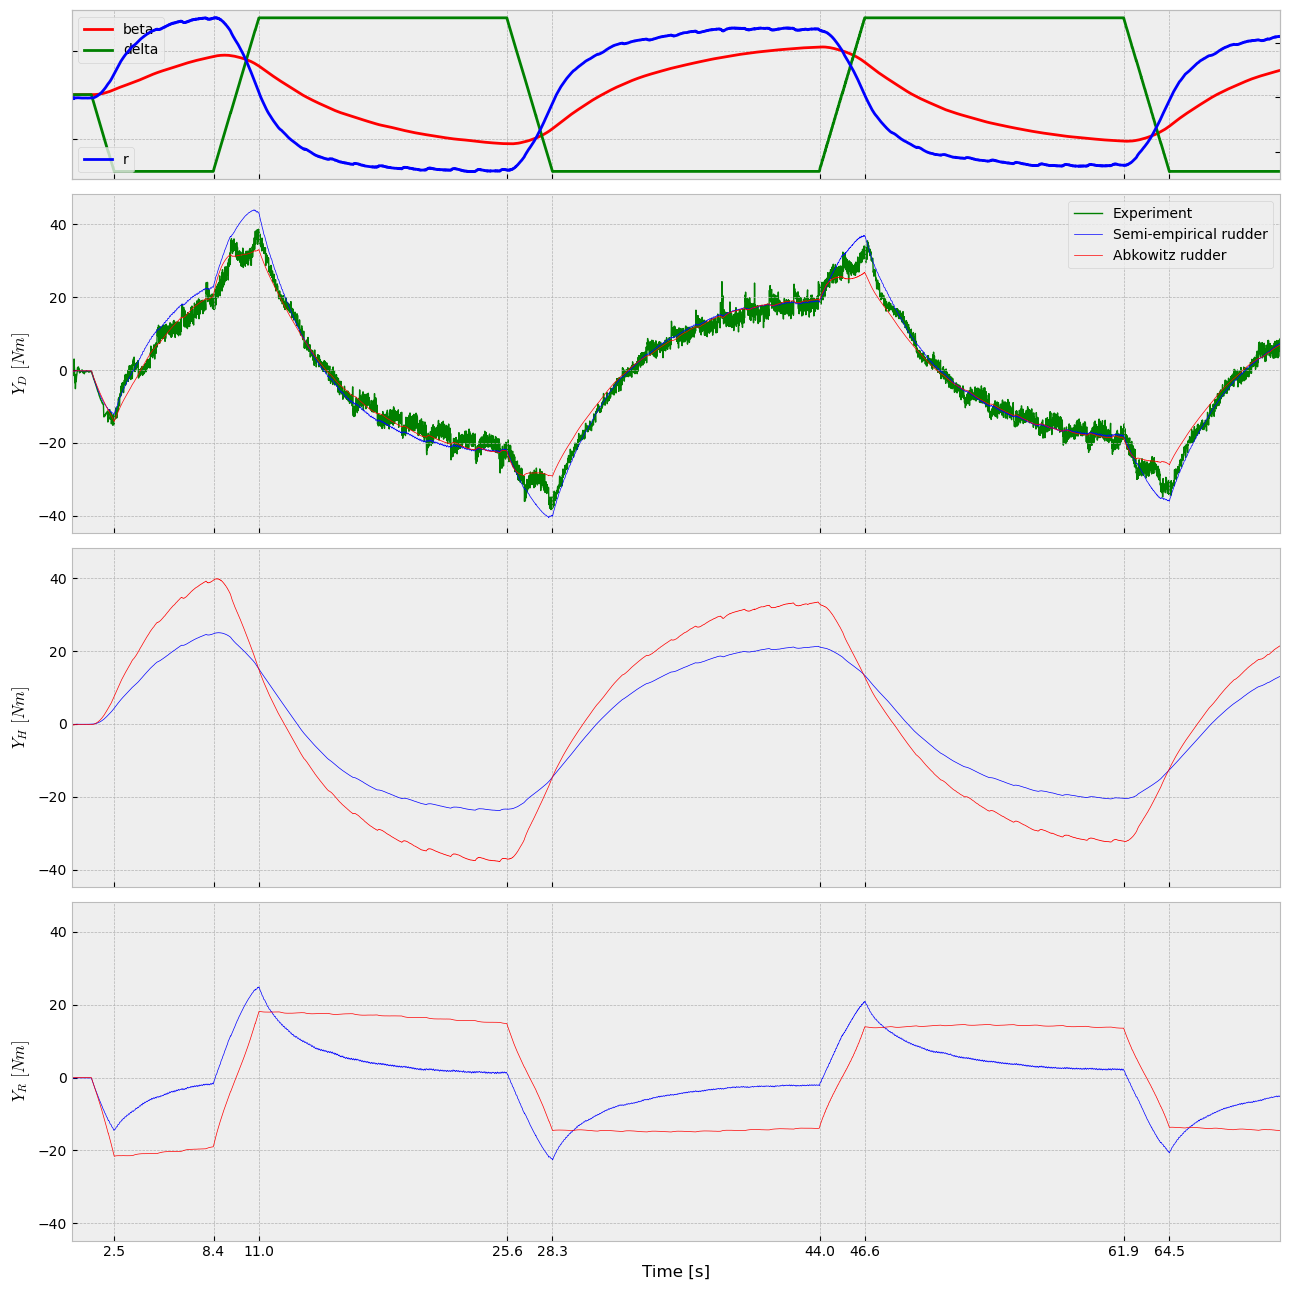

In [13]:
plot_compare_model_forces(model=model_MDL, models=models, data=data_MDL_ek, keys=['Y_D','Y_H','Y_R'], styles=styles)

## Simulation
Open loop simulations can also be conducted with the two models.

In [14]:
result_MDL = model_MDL.simulate(data_MDL)
result_MDL_abkowitz = model_abkowitz_MDL.simulate(data_MDL)

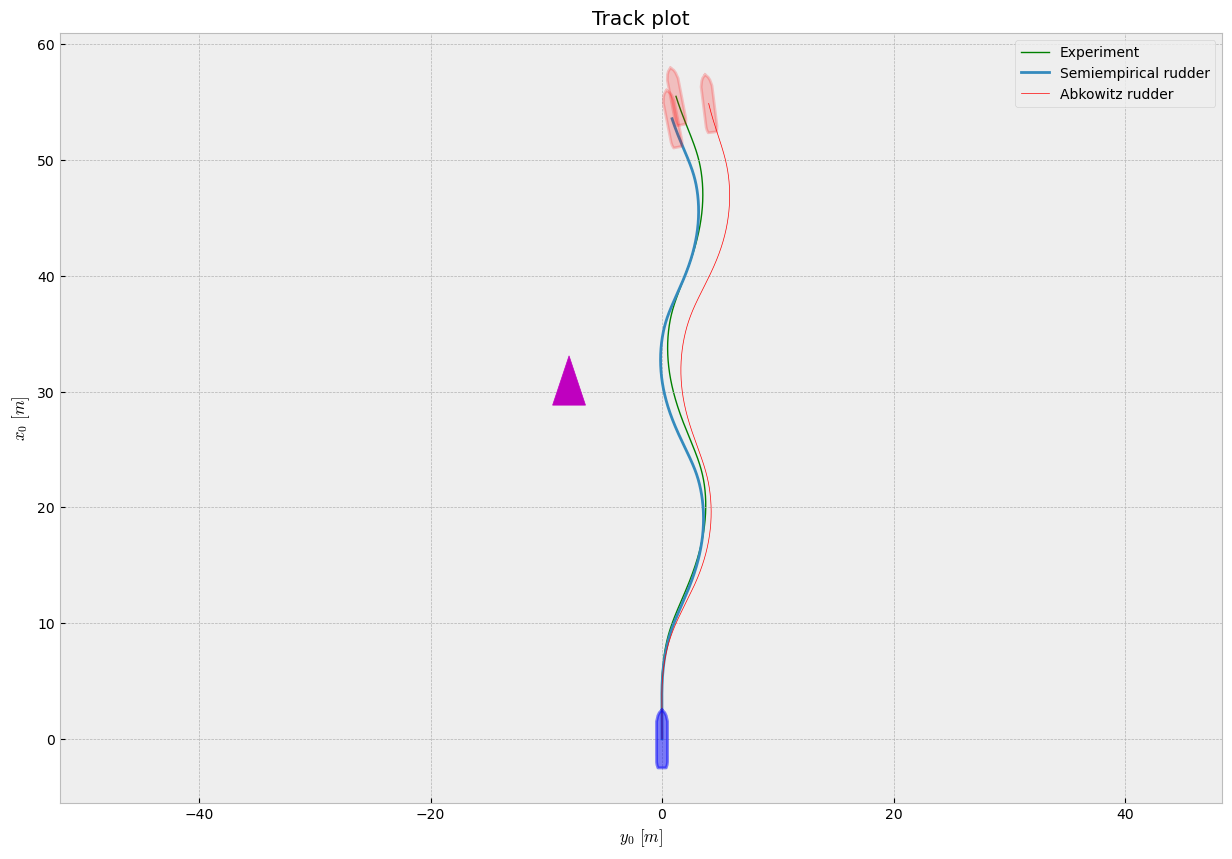

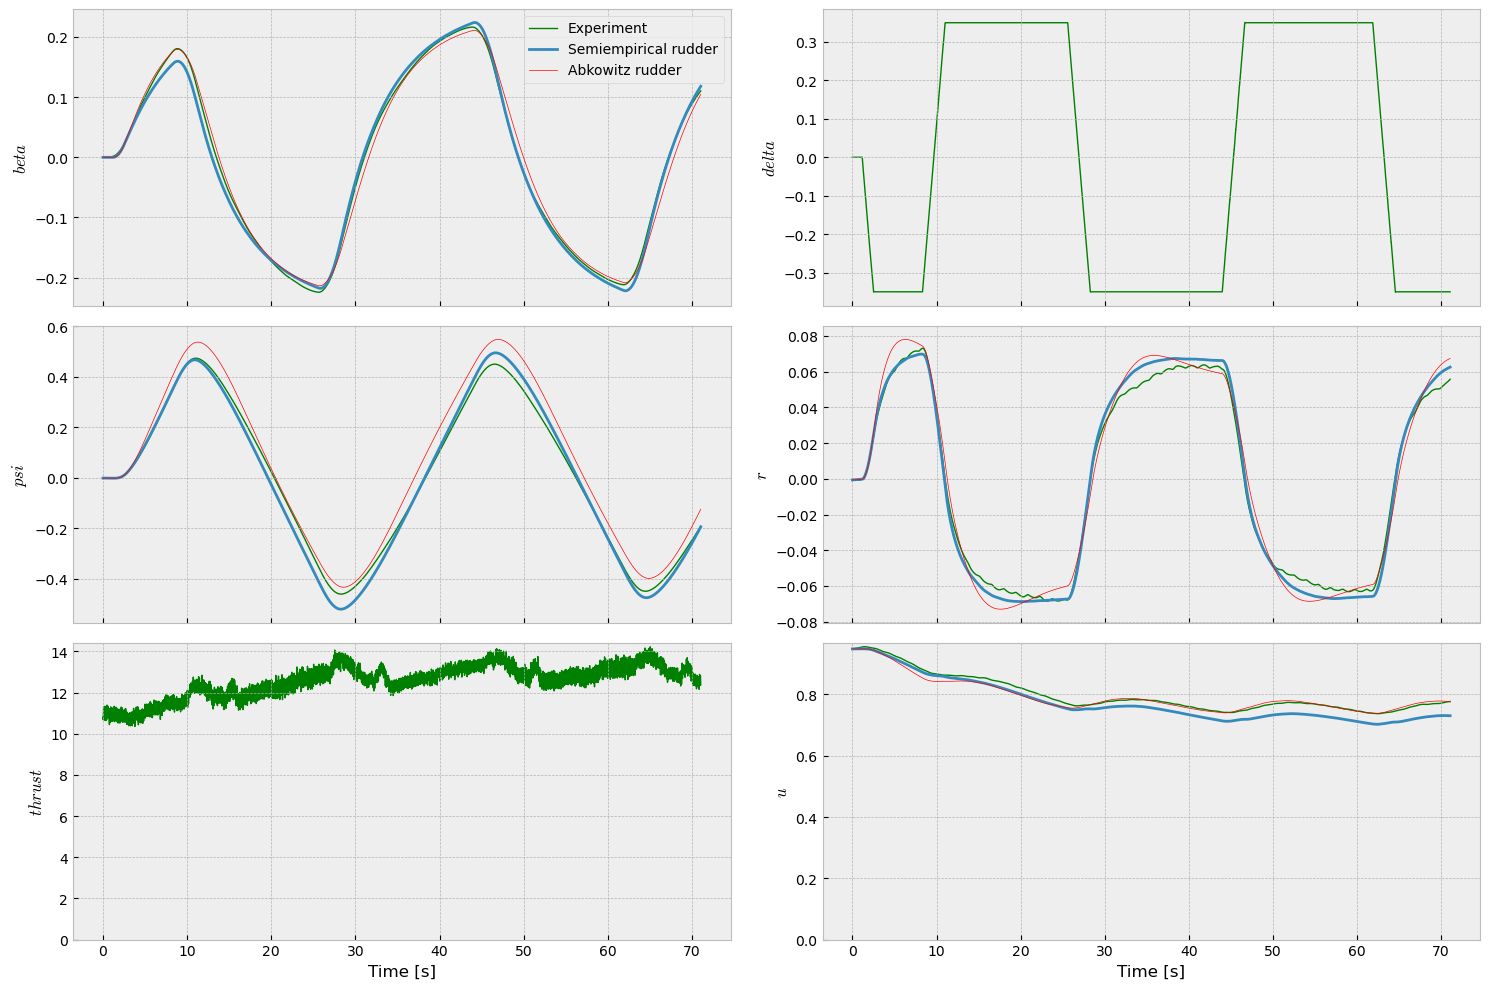

In [15]:
dataframes = {'Experiment':data_MDL,
              'Semiempirical rudder':result_MDL,
              'Abkowitz rudder':result_MDL_abkowitz,
              
             }


ax = track_plots(dataframes=dataframes, lpp=ship_data['L'], beam=ship_data['B'], N=2, styles=styles);
plot(dataframes=dataframes, keys=['u','thrust','r','beta','delta','psi'], styles=styles);